<a href="https://colab.research.google.com/github/Chaitra-07/chai/blob/master/Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE**

The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('gdrive/My Drive/mydataset/turnover.csv')

In [6]:
df.shape

(14999, 10)

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

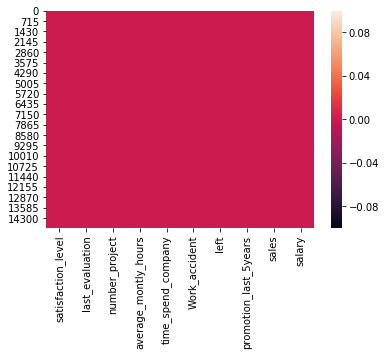

In [9]:
sns.heatmap(df.isnull())

In [0]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [11]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover',front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [12]:
# Looks like about 76% of employees stayed and 24% of employees left. 
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [13]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [14]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


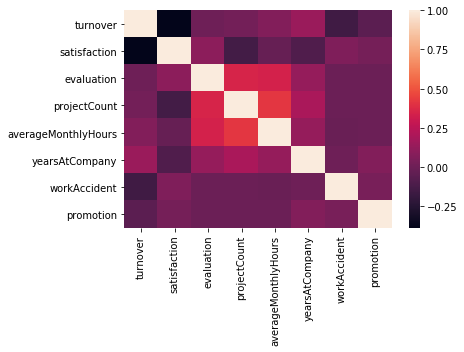

In [15]:
#Correlation Matrix
corr = df.corr()
sns.heatmap(corr)
corr

From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied

In [16]:
#One-Sample T-Test (Measuring Satisfaction Level)

import scipy.stats as stats
stats.ttest_1samp(a= df[df['turnover']==1]['satisfaction'], popmean = df[df['turnover']==0]['satisfaction'].mean())  

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

One-Sample T-Test Summary

T-Test = -51.33 | P-Value = 0.000_ | Reject Null Hypothesis

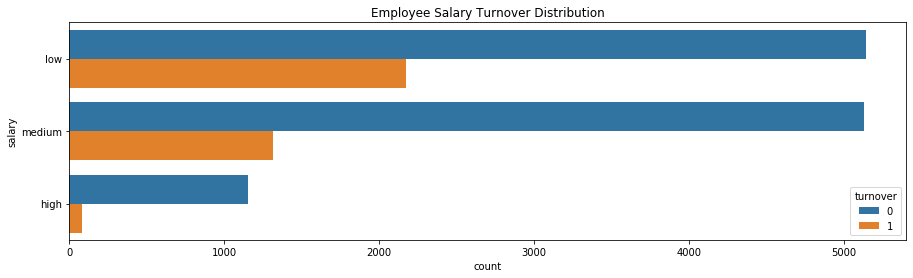

In [17]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

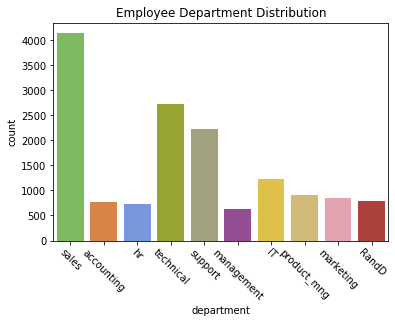

In [18]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

Text(0.5, 1.0, 'Employee Department Turnover Distribution')

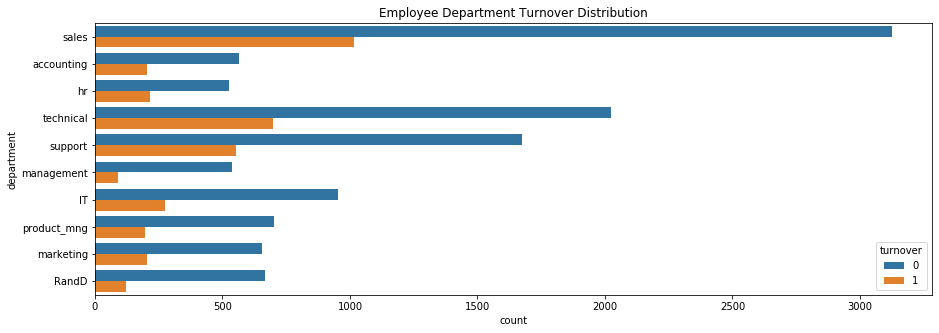

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution')

**K-Means Clustering of Employee Turnover**
1. Cluster 1 (Blue): Hard-working and Sad Employees
2. Cluster 2 (Red): Bad and Sad Employee
3. Cluster 3 (Green): Hard-working and Happy Employee




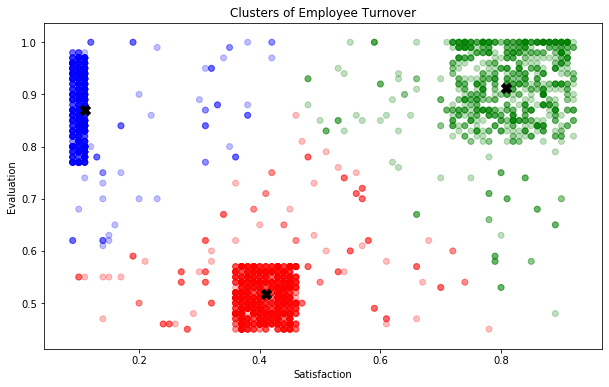

In [20]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()


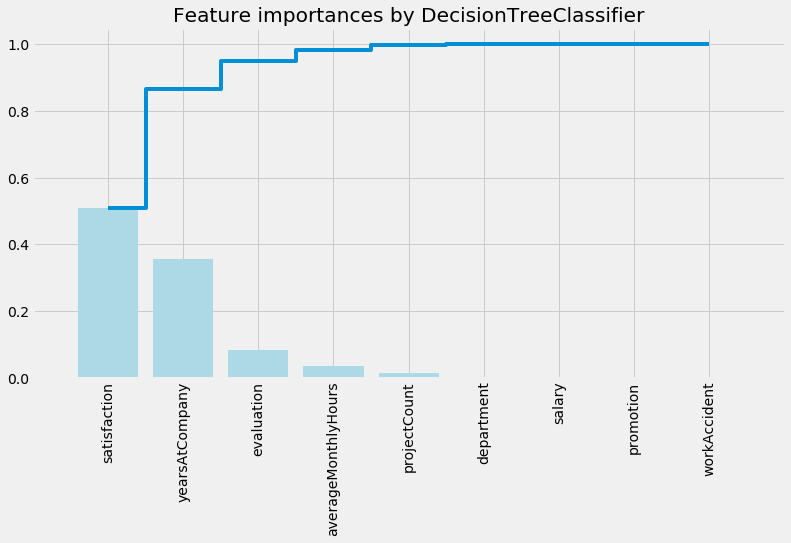

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [27]:
X_train.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
9003,0.59,1.00,4,275,3,0,0,1,2
5697,0.81,0.98,6,196,2,0,0,8,1
10691,1.00,0.93,5,231,2,0,0,5,2
1884,0.87,0.91,5,228,5,0,0,8,1
13572,0.87,0.48,5,242,3,0,0,7,2


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


In [31]:
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print(classification_report(y_test, rf.predict(X_test)))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)




 ---Random Forest Model---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.98       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

Random Forest AUC = 0.98


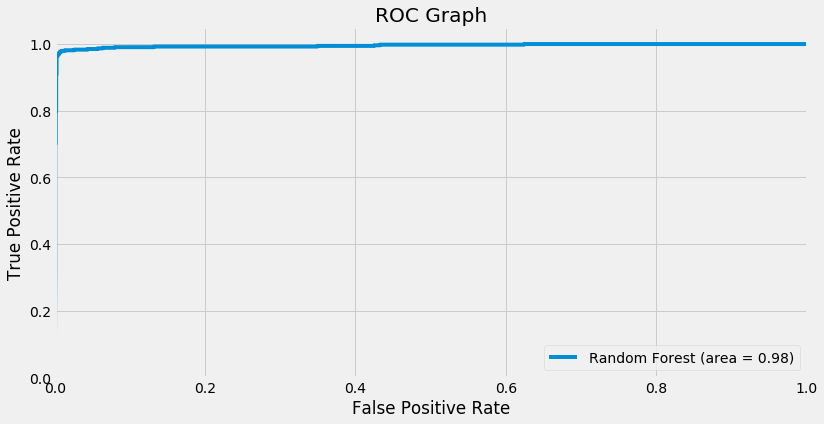

In [32]:
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# **Interpreting the Data**
Summary: With all of this information, this is what Bob should know about his company and why his employees probably left:

1. Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
2. Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
3. Employees with either really high or low evaluations should be taken into consideration for high turnover rate
4. Employees with low to medium salaries are the bulk of employee turnover
5. Employees that had 2,6, or 7 project count was at risk of leaving the company
6. Employee satisfaction is the highest indicator for employee turnover.
7. Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate
8. Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.
